In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
try:
    df = pd.read_excel('/content/Student_Satisfaction_Survey.xlsx')
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print("Error: The file 'Student_Satisfaction_Survey.xlsx' was not found.")
    print("Please make sure the file is uploaded to the '/content/' directory in your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
if 'Average/ Percentage' in df.columns:
    df['Satisfaction_Percentage'] = df['Average/ Percentage'].apply(lambda x: float(str(x).split('/')[1].strip().replace('%', '')) if isinstance(x, str) and '/' in str(x) else None)

    df = df.drop(columns=['Average/ Percentage'])
else:
    print("'Average/ Percentage' column not found.")

print("Null values in 'Satisfaction_Percentage':", df['Satisfaction_Percentage'].isnull().sum())



Null values in 'Satisfaction_Percentage': 0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    return None

df['Sentiment'] = df['Questions'].apply(get_sentiment)
df['Sentiment_Polarity'] = df['Questions'].apply(lambda text: TextBlob(str(text)).sentiment.polarity if isinstance(text, str) else None)


/tmp/ipython-input-3003121240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])


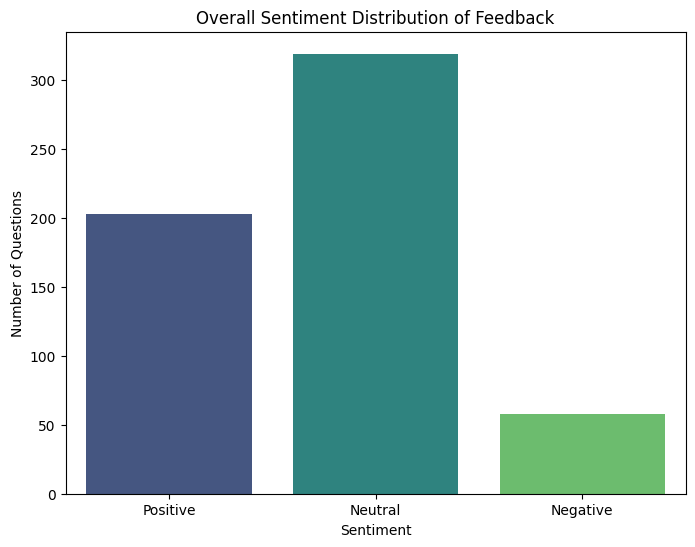

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Overall Sentiment Distribution of Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Questions')
plt.savefig('overall_sentiment_distribution.png')
plt.show()



Top 3 Courses with Highest Satisfaction:
 Course Name
FYBA                              91.000
MSC ANALYTICAL CHEMISTRY SEM I    90.500
TYBSC                             90.444
Name: Satisfaction_Percentage, dtype: float64


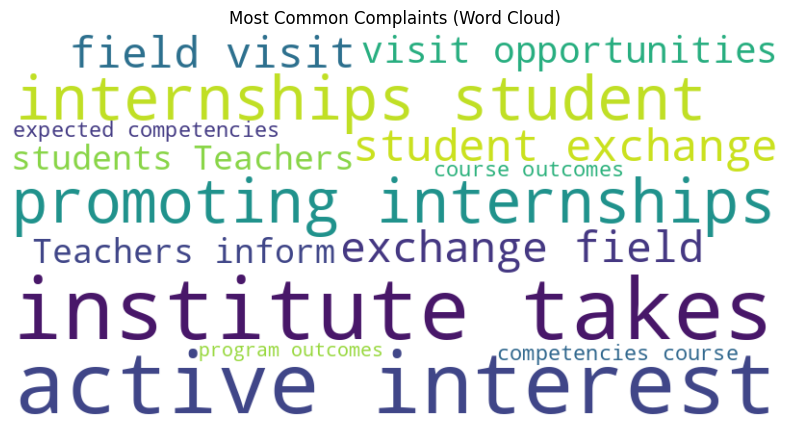

In [ ]:
course_satisfaction = df.groupby('Course Name')['Satisfaction_Percentage'].mean().sort_values(ascending=False)
print("\nTop 3 Courses with Highest Satisfaction:\n", course_satisfaction.head(3))
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['Questions'].dropna())

if negative_comments:

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', negative_comments)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Complaints (Word Cloud)')
    plt.savefig('common_complaints_wordcloud.png')
    plt.show()
else:
    print("\nNo negative comments found to generate a word cloud.")


/tmp/ipython-input-3479830998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Satisfaction_Percentage', y='Course Name', data=df.groupby('Course Name')['Satisfaction_Percentage'].mean().sort_values(ascending=False).reset_index(), palette='viridis')


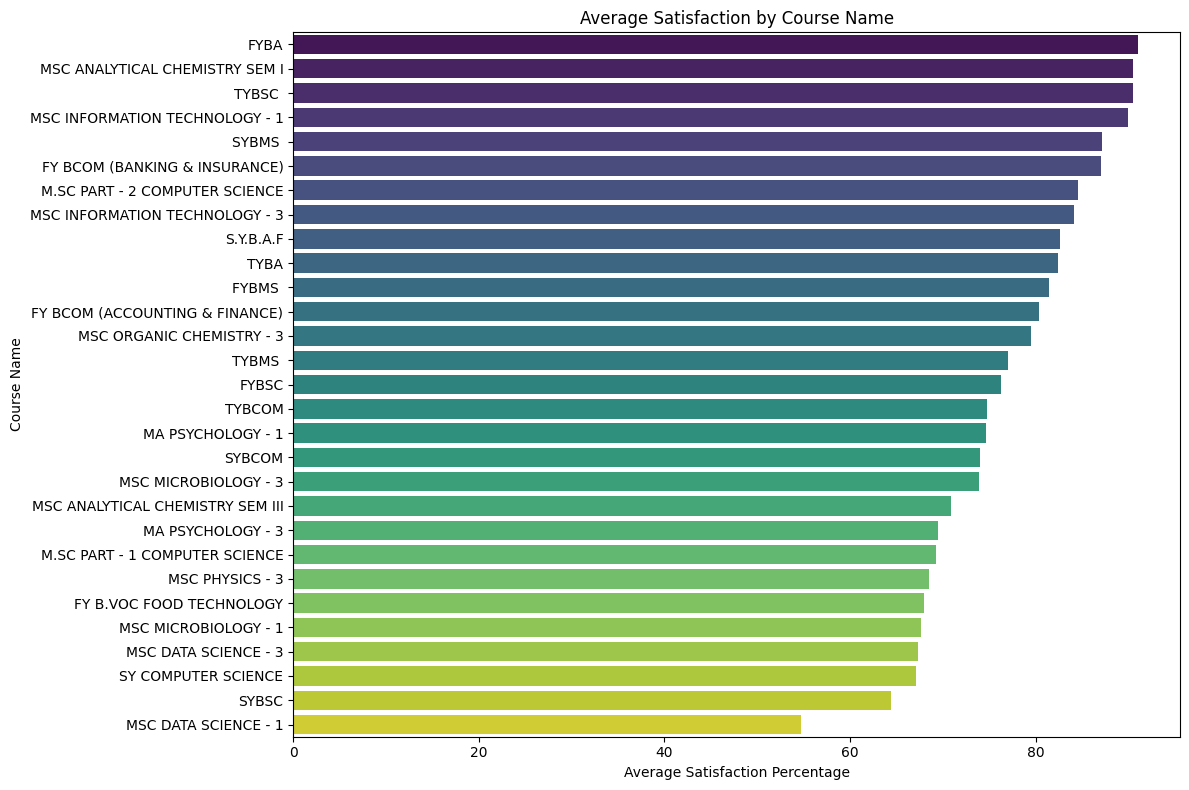

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Satisfaction_Percentage', y='Course Name', data=df.groupby('Course Name')['Satisfaction_Percentage'].mean().sort_values(ascending=False).reset_index(), palette='viridis')
plt.title('Average Satisfaction by Course Name')
plt.xlabel('Average Satisfaction Percentage')
plt.ylabel('Course Name')
plt.tight_layout()
plt.savefig('satisfaction_by_course_name.png')
plt.show()


In [ ]:
department_sentiment = df.groupby('Basic Course')['Sentiment_Polarity'].mean().sort_values(ascending=False)
print("\nDepartments with Highest Average Sentiment Polarity (Most-Liked Events):\n", department_sentiment.head(5))



Departments with Highest Average Sentiment Polarity (Most-Liked Events):
 Basic Course
B.SC. COMPUTER SCIENCE                           0.129417
B.VOC FOOD TECHNOLOGY                            0.129417
BACHELOR OF ARTS                                 0.129417
BACHELOR OF COMMERCE                             0.129417
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)    0.129417
Name: Sentiment_Polarity, dtype: float64


In [ ]:
department_satisfaction = df.groupby('Basic Course')['Satisfaction_Percentage'].mean().sort_values(ascending=False)
print("\nDepartments with Highest Average Satisfaction (Most-Liked Events):\n", department_satisfaction.head(5))



Departments with Highest Average Satisfaction (Most-Liked Events):
 Basic Course
MSC INFORMATION TECHNOLOGY                       87.08300
BACHELOR OF COMMERCE (BANKING AND INSURANCE)     87.00000
BACHELOR OF ARTS                                 86.70575
BACHELOR OF MANAGEMENT STUDIES                   81.84250
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)    81.52150
Name: Satisfaction_Percentage, dtype: float64


In [ ]:
df.to_csv('processed_student_satisfaction_survey.csv', index=False)

First, we need to calculate the correlation matrix of the numerical columns in the DataFrame.

In [ ]:
# Calculate the correlation matrix
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns
correlation_matrix = numerical_df.corr()

Now we can generate the heatmap using the calculated correlation matrix.

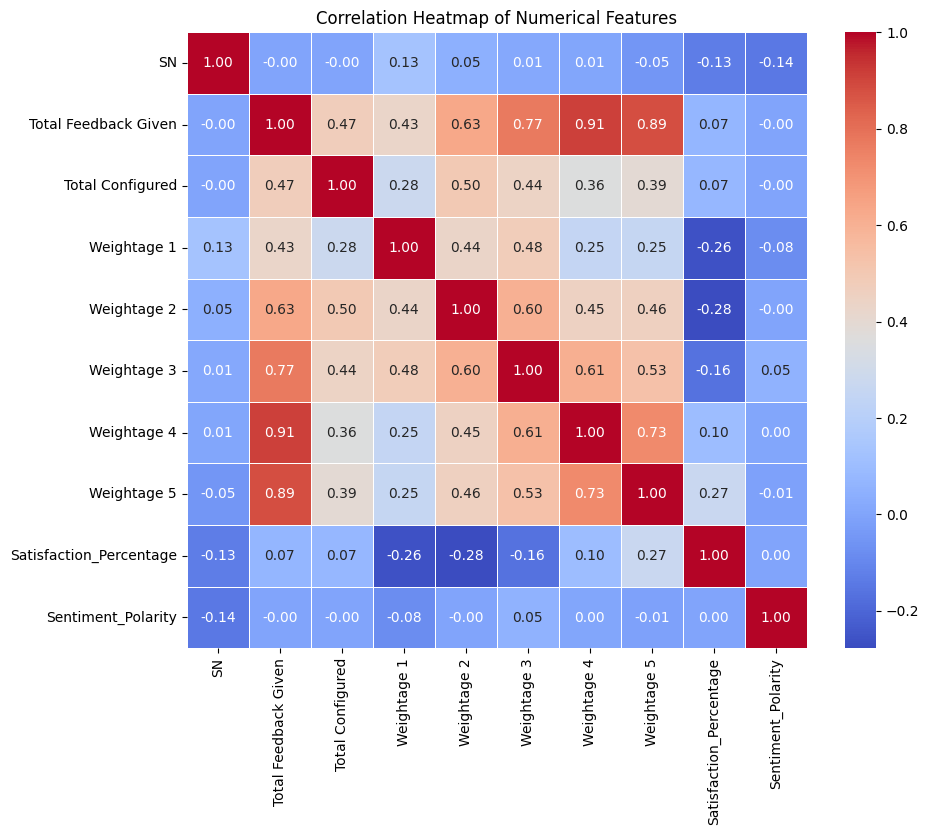


Correlation Matrix:
                                    SN  Total Feedback Given  Total Configured  \
SN                       1.000000e+00         -1.306417e-16     -9.479326e-17   
Total Feedback Given    -1.306417e-16          1.000000e+00      4.726671e-01   
Total Configured        -9.479326e-17          4.726671e-01      1.000000e+00   
Weightage 1              1.293028e-01          4.261962e-01      2.772942e-01   
Weightage 2              4.658398e-02          6.340368e-01      4.977140e-01   
Weightage 3              1.433845e-02          7.712354e-01      4.424594e-01   
Weightage 4              6.159087e-03          9.124568e-01      3.594649e-01   
Weightage 5             -5.204303e-02          8.852232e-01      3.940431e-01   
Satisfaction_Percentage -1.280812e-01          7.024823e-02      7.206532e-02   
Sentiment_Polarity      -1.435691e-01         -3.523329e-18     -3.267140e-17   

                         Weightage 1  Weightage 2  Weightage 3  Weightage 4  \
SN     

In [ ]:
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Display the correlation matrix for reference
print("\nCorrelation Matrix:\n", correlation_matrix)

In [ ]:
import os

file_path = '/content/Student_Satisfaction_Survey.csv'
if not os.path.exists(file_path):
  print(f"Error: File not found at {file_path}")
  print("Please check the file path and make sure the file is uploaded to your Colab environment.")
else:
  print(f"File found at {file_path}. You can proceed with loading the data.")

Error: File not found at /content/Student_Satisfaction_Survey.csv
Please check the file path and make sure the file is uploaded to your Colab environment.
